<a href="https://colab.research.google.com/github/Amith07220/Sentimental-Analysis/blob/main/Assignment_9_C0937030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install openpyxl seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_excel("/content/flight_price.xlsx")

df.head()
df.tail()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# **PART 1: BASIC EXPLORATION**

In [ ]:
# Shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns)

# Info and summary stats
df.info()
df.describe()

# Check for null values
df.isnull().sum()


Shape: (10683, 11)
Columns: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
# Drop or fill based on column
df['Additional_Info'].fillna("No info", inplace=True)
df.dropna(inplace=True)


# **PART 2: Data Cleaning and Preprocessing**

In [ ]:

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

In [ ]:
# Convert Columns to Datetime Format:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], errors='coerce')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], errors='coerce')


In [ ]:
# Extract Features from Dates
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute



In [ ]:
# Convert Duration to Minutes:
def convert_duration(duration):
    duration = duration.replace('h', ' hours').replace('m', ' minutes')
    if 'hours' not in duration:
        duration = '0 hours ' + duration
    if 'minutes' not in duration:
        duration += ' 0 minutes'
    parts = duration.split()
    return int(parts[0]) * 60 + int(parts[2])

df['Duration_mins'] = df['Duration'].apply(convert_duration)

In [ ]:
# Encode Categorical Features:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


# **PART 3: Univariate Analysis**

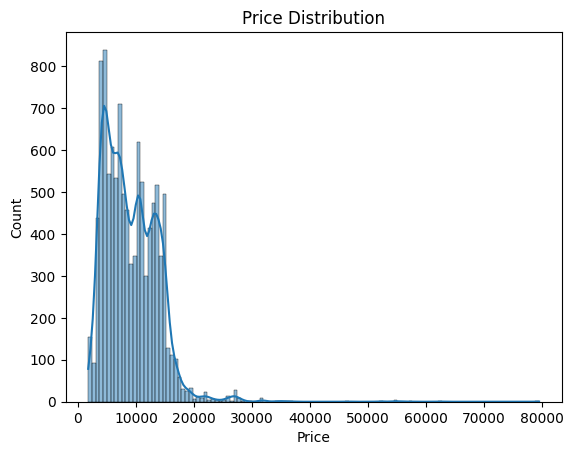

In [ ]:
# Distribution of Price:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()


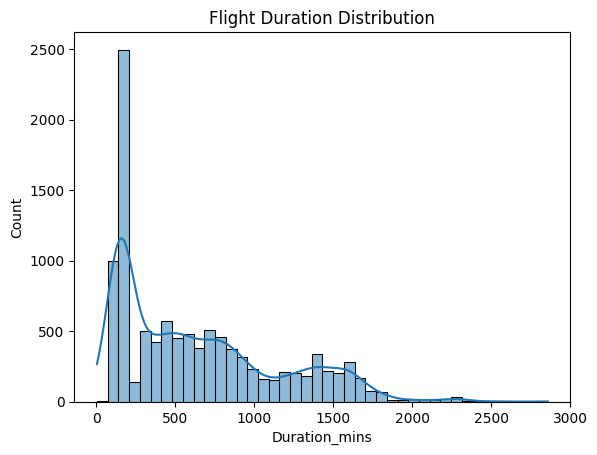

In [ ]:
# Distribution of Duration:
sns.histplot(df['Duration_mins'], kde=True)
plt.title("Flight Duration Distribution")
plt.show()


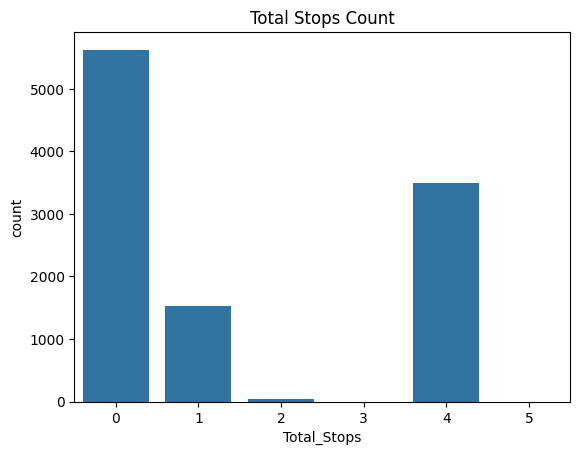

In [ ]:
# Distribution of Total Stops:
sns.countplot(x='Total_Stops', data=df)
plt.title("Total Stops Count")
plt.show()


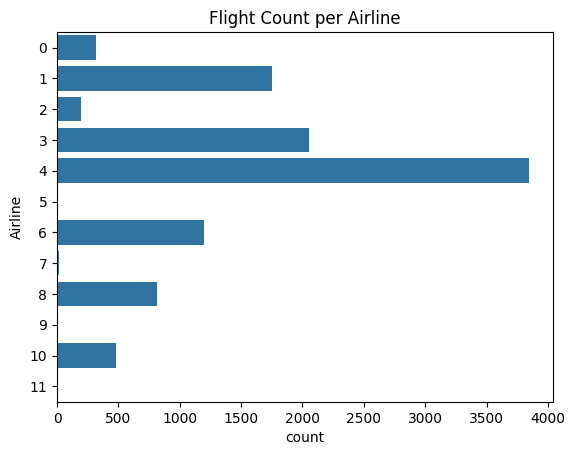

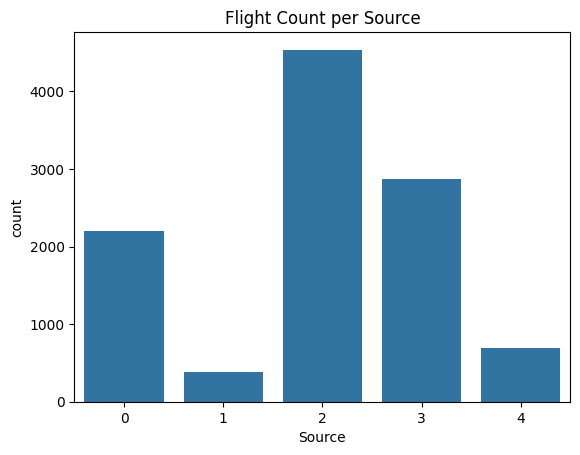

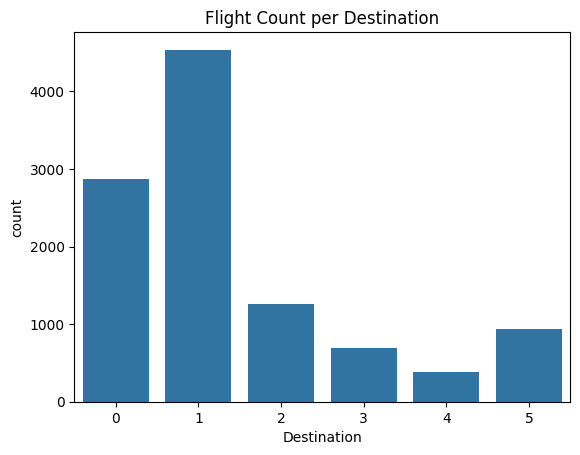

In [ ]:
#  Count Plots for Categorical Columns:
sns.countplot(y='Airline', data=df)
plt.title("Flight Count per Airline")
plt.show()

sns.countplot(x='Source', data=df)
plt.title("Flight Count per Source")
plt.show()

sns.countplot(x='Destination', data=df)
plt.title("Flight Count per Destination")
plt.show()


# **Part 4: Bivariate and Multivariate Analysis:**

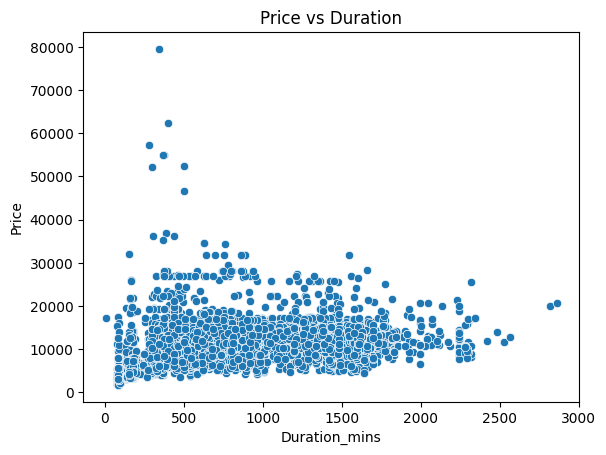

In [ ]:
# Price vs Duration:
sns.scatterplot(x='Duration_mins', y='Price', data=df)
plt.title("Price vs Duration")
plt.show()


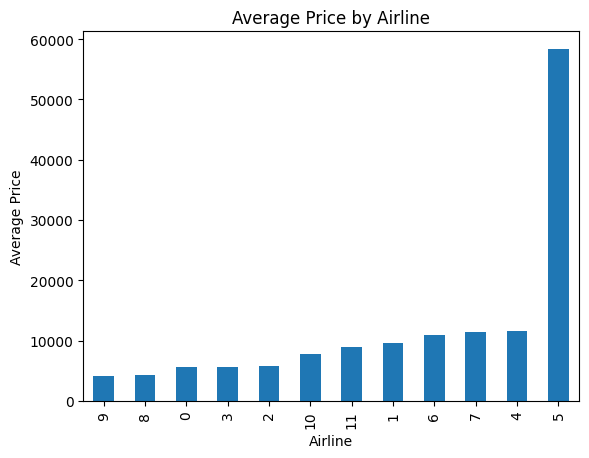

In [ ]:
# Average Flight Prices by Airline:
df.groupby('Airline')['Price'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Airline")
plt.ylabel("Average Price")
plt.show()


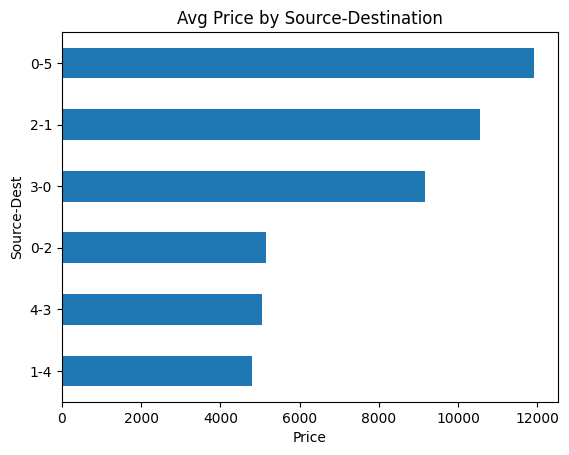

In [ ]:
# Average Prices by Source-Destination:
df['Source-Dest'] = df['Source'].astype(str) + '-' + df['Destination'].astype(str)
df.groupby('Source-Dest')['Price'].mean().sort_values().plot(kind='barh')
plt.title("Avg Price by Source-Destination")
plt.xlabel("Price")
plt.show()


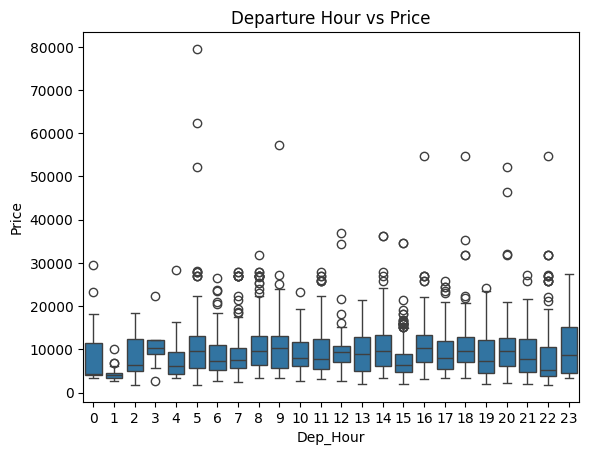

In [ ]:
#  Price vs Time of Day:
sns.boxplot(x='Dep_Hour', y='Price', data=df)
plt.title("Departure Hour vs Price")
plt.show()


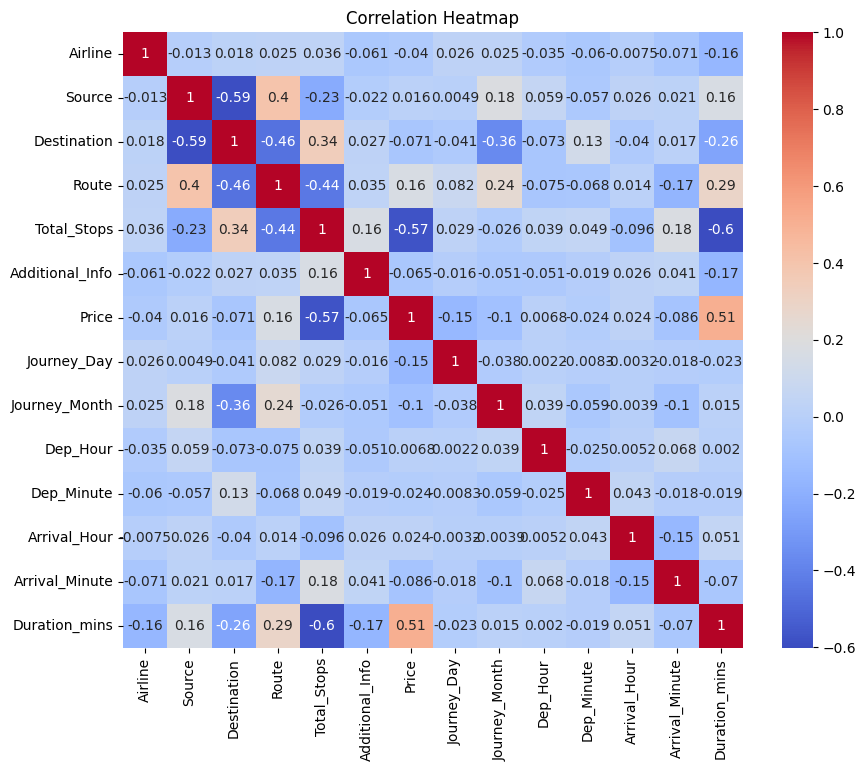

In [ ]:
# Correlation Heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Duration', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Part 5: Feature Engineering:**

In [ ]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Dep_Hour'].apply(time_of_day)
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if x in [6, 7, 8, 17, 18, 19] else 0)


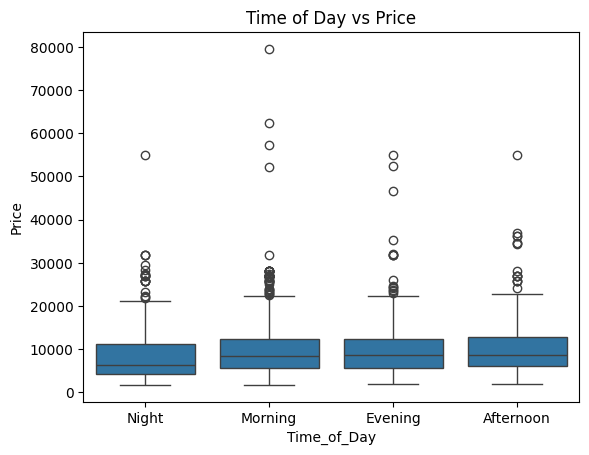

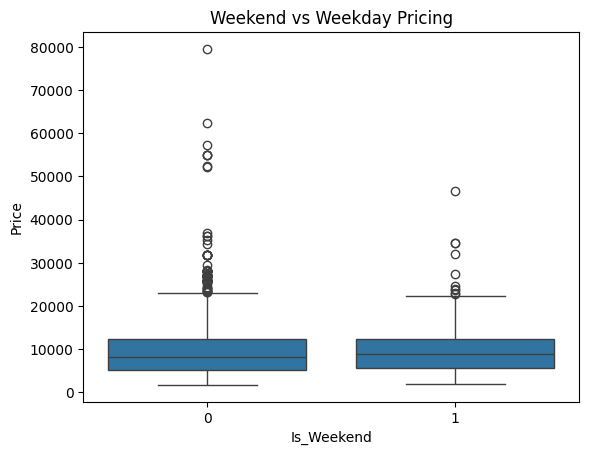

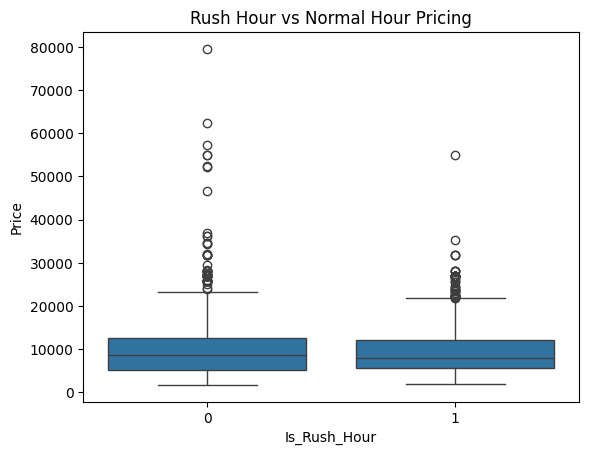

In [ ]:
sns.boxplot(x='Time_of_Day', y='Price', data=df)
plt.title("Time of Day vs Price")
plt.show()

sns.boxplot(x='Is_Weekend', y='Price', data=df)
plt.title("Weekend vs Weekday Pricing")
plt.show()

sns.boxplot(x='Is_Rush_Hour', y='Price', data=df)
plt.title("Rush Hour vs Normal Hour Pricing")
plt.show()


# **Part 6: Insights and Reporting:**

In [ ]:
# TOP 5 INSIGHTS:

 # Evening flights are generally more expensive than morning ones.
 # Flights with more stops are usually cheaper.
 #Some airlines like Air India charge significantly more on average.
 #Weekend flights cost more compared to weekday flights.
 # Rush hour flights (6–9 AM and 5–8 PM) show a spike in prices.

# Suggestions for Travellers:

# Prefer early morning or weekday flights for budget-friendly fares.
# choose 1-stop flights to save time with moderate cost.
# Book flights well in advance during off-peak hours.